In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

In [83]:
dfclient = pd.read_csv('client_info.csv', parse_dates=True)
dfclient.head()

,clientid,site,gender,ethnicity,registration_date,postcode_outcode,postcode_sector,birth_year,birth_month
0,147,Glasgow North,Male,White-British,2010-04-01,G37,G37 0,1992,11.0
1,475,Inverclyde,Male,White-British,2012-11-07,PA14,PA14 6,1991,3.0
2,531,Inverclyde,Male,White-British,2012-11-07,PA15,PA15 2,1990,10.0
3,584,Inverclyde,Male,White-British,2012-05-31,PA14,PA14 6,1996,1.0
4,1642,Middlesbrough,Male,White-British,2013-02-06,TS2,TS2 1,1984,7.0


# 1. Based on client information, which is the most common postcode outcode?
2. Based on the client information, how does the number of yearly client registrations vary from 2012 until 2018? [the numbers per year or a plot are both good!]
3. What is the mean/median/standard deviation for the number of client beneficiary hours dedicated to activities?
4. Using the `training` data, what is the most and least popular course (by number of people enrolled)?
5. Who is the (hashed) caseload manager with the most clients?
6. How many clients have disengaged? What % is this? [hint: use both `client_info` and `clientid_disengage`]

In [4]:
dfclient.groupby('postcode_outcode').size().sort_values(ascending = False).head(1)

postcode_outcode
G81    229
dtype: int64

In [8]:
dfclient['postcode_outcode'].value_counts().head(1)

G81    229
Name: postcode_outcode, dtype: int64

In [48]:
dfclient['registration_date']=pd.to_datetime(dfclient['registration_date'])
dfclient =dfclient.loc[dfclient['registration_date'] >= '2014-01-01']
dfyear=dfclient.groupby([dfclient['registration_date'].dt.year]).size().to_frame()
dfyear
#dfclient['registration_date']

,0
registration_date,
2014,2104
2015,2175
2016,2107
2017,2748
2018,1841
2019,1069
2020,1


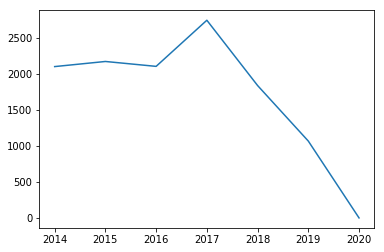

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dfyear)

In [54]:
dfclientposiout = pd.read_csv('clientid_positive_outcome.csv')
dfcaseload = pd.read_csv('caseload.csv')
dfactivity = pd.read_csv('activity.csv')
dfactposout = pd.read_csv('activity_positive_outcomes.csv')
dfclientdiseng= pd.read_csv('clientid_disengage.csv')
dftraining = pd.read_csv('training.csv')
dfcliprofile = pd.read_csv('client_profile.csv')
dfquestion = pd.read_csv('questionnaire.csv')

In [55]:
dfactivity.head()
dfactivity.activity_group.unique()
dfactivity.groupby('activity_group').describe()

clientid                                      \
                              count          mean          std      min   
activity_group                                                            
Academy Exit Route           9984.0  14479.599459  3863.365923    531.0   
Aftercare                     910.0  12237.769231  1527.649565   5850.0   
Disengagement                 762.0  13972.631234  2277.031996   6313.0   
ESF Payment Claims             10.0  15528.200000   641.712258  15170.0   
Engagement                  16543.0  13282.747688  4672.259572    475.0   
Fitness Testing               620.0  18602.708065  2510.073489   5144.0   
Hard Outcomes                8009.0  13707.541016  4261.641378    531.0   
Not in use                   6781.0  10234.057219  2859.587060    475.0   
Progression Milestones       6185.0  10796.620695  4932.996843    531.0   
Qualification (Registered)   7777.0  14063.469075  3946.913394    531.0   
Qualification (Result)       8200.0  11141.248780  4048.926189    531.0   
Rathbone Payment Claims         2.0  13574.500000     3.535534  13572.0   
Referrals                      40.0   6423.100000  1330.717250   5331.0   
SDS Payment Claims           1500.0  12268.930000  1167.795969   5931.0   
Starter Type                12319.0  15491.115837  3572.077778    531.0   
Sustainability              17838.0  13988.564133  3947.626854    531.0   
Work Experience (Complete)   2098.0  15972.129171  3079.576173   5123.0   
Work Experience (Started)    2154.0  12938.867688  4490.256396    584.0   

                                                                  \
                                 25%      50%       75%      max   
activity_group                                                     
Academy Exit Route          11396.75  14669.0  17460.25  22083.0   
Aftercare                   11254.25  12245.0  13291.00  16669.0   
Disengagement               12604.50  13898.5  15047.00  21487.0   
ESF Payment Claims          15186.75  15237.0  15314.25  16742.0   
Engagement                   9574.50  13059.0  16972.50  22125.0   
Fitness Testing             16727.00  18922.0  20863.25  21798.0   
Hard Outcomes               10540.00  13890.0  16970.00  22085.0   
Not in use                   8826.00   9801.0  11032.00  22122.0   
Progression Milestones       6835.00   9305.0  15258.00  21798.0   
Qualification (Registered)  11446.00  13823.0  17266.00  21988.0   
Qualification (Result)       7605.75  10660.0  13880.25  21836.0   
Rathbone Payment Claims     13573.25  13574.5  13575.75  13577.0   
Referrals                    5465.75   6436.0   6477.25  10841.0   
SDS Payment Claims          11666.00  12240.5  13273.00  16669.0   
Starter Type                12678.50  15437.0  18163.50  22125.0   
Sustainability              11211.00  14184.0  16850.75  22085.0   
Work Experience (Complete)  13515.50  16071.0  18500.75  21987.0   
Work Experience (Started)    9301.25  13277.5  16469.75  21987.0   

                           client_beneficiary_hours                            \
                                              count      mean        std  min   
activity_group                                                                  
Academy Exit Route                           9984.0  0.025741   1.859817  0.0   
Aftercare                                     910.0  0.000000   0.000000  0.0   
Disengagement                                 762.0  0.000000   0.000000  0.0   
ESF Payment Claims                             10.0  0.000000   0.000000  0.0   
Engagement                                  16543.0  0.000000   0.000000  0.0   
Fitness Testing                               620.0  0.000000   0.000000  0.0   
Hard Outcomes                                8009.0  0.135847   2.073427  0.0   
Not in use                                   6781.0  0.000000   0.000000  0.0   
Progression Milestones                       6185.0  0.000000   0.000000  0.0   
Qualification (Registered)                   7777.

In [56]:
#Using the training data, what is the most and least popular course (by number of people enrolled)?

print(dftraining.groupby('course_title').size().sort_values(ascending =True).head(1))
print(dftraining.groupby('course_title').size().sort_values(ascending =True).tail(1))

course_title
Dunbartonshire - West Dunbartonshire - Inspiring Scotland Football Jan 17    1
dtype: int64
course_title
London South West Traineeship Academy October 2014    1669
dtype: int64


In [139]:
#Who is the (hashed) caseload manager with the most clients?
dfcaseload.head()
print(dfcaseload.groupby('hashed_caseload_manager').size().sort_values(ascending =False).head(1))

hashed_caseload_manager
-8483829188084570685    677
dtype: int64


In [57]:
#How many clients have disengaged? What % is this? [hint: use both client_info and clientid_disengage]
total=dfclient.clientid.count()
dis=dfclientdiseng.count()
#dfclient.count()
print('percentage of disengaged' ,float(dis * 100) /total)


percentage of disengaged 6.234952262349522


In [171]:
#How many clients have had a positive outcome? What % is this? [hint: use both client_info and clientid_positive_outcome]
total=dfclient.clientid.count()
dis=dfclientposiout.count()
print('percentage of positive outcome' ,float(dis * 100) /total)



percentage of positive outcome 48.70388507998694


In [173]:
#. Which sites have the most clients? . Which sites are growing fastest?
dfclient.head()
dfclient.groupby('site').size().sort_values(ascending = False).head(5)


site
Manchester Central        866
Edinburgh South West      681
Hamilton - Powerleague    524
Glasgow South East        519
London South              510
dtype: int64

In [175]:
'''
Question 2: Engagement

Disengagement is when a client drops out without completing a programme. Conversely, engagement is the continued participation in a programme.

- What are the key factors that promote engagement?
- What are the key factors that lead to disengagement?
- Are there seasonal periods, or programme phases, where disengagement is highest?
- Is engagement influenced by the number of previous programmes undertaken by a client?

Relevant data sets: `clientid_disengage.csv`, `client_info.csv`, `client_profile.csv`, `activity.csv`, `questionnaire.csv`, `training.csv`
dfclient
dfclientposiout 
dfactivity 
dfactposout 
dfclientdiseng
dftraining 
dfcliprofile 
dfquestion 
'''

dfquestion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30348 entries, 0 to 30347
Data columns (total 7 columns):
clientid              30348 non-null int64
questionnaireid       30348 non-null int64
questionnairename     30348 non-null object
nvhprofileitemname    30197 non-null object
ratinganswer          30348 non-null int64
yesnoanswer           30348 non-null int64
questionignored       30197 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.6+ MB


In [58]:
#dfdisengaged = dfclien.merge(dfclientdiseng)

dfdisengaged = pd.merge(dfclient,dfclientdiseng,left_on='clientid',right_on='clientid',how='right')
dfdisengaged


,clientid,site,gender,ethnicity,registration_date,postcode_outcode,postcode_sector,birth_year,birth_month
0,6471,Ravenscraig - Motherwell,Male,White-Scottish,2015-09-29,ML4,ML4 2,1996,4.0
1,6578,Manchester Central,Male,Asian/Asian British-Pakistani,2016-02-22,M12,M12 4,1993,4.0
2,9074,London South East,Male,Black/Black British-Other,2014-02-06,SE15,SE15 5,1993,4.0
3,9286,Edinburgh North East,Male,White-Other,2014-04-25,EH5,EH5 2,1997,1.0
4,9405,Edinburgh North East,Male,White-British,2014-05-09,EH16,EH16 4,1999,1.0
5,9618,West Lothian,Male,White-Scottish,2014-06-02,EH48,EH48 3,2014,6.0
6,9743,East Ayrshire 1,Male,White-Scottish,2014-06-10,KA1,KA1 4,1997,7.0
7,9966,London North,Male,Asian/Asian British-Other,2014-07-24,N7,N7 8,1997,9.0
8,10032,London South East,Male,Other,2014-07-29,SE11,SE11 4,1998,2.0
9,10139,West Lothian,Male,White-British,2014-08-22,EH54,EH54 8,1997,3.0


In [236]:
disengbygender = dfdisengaged.groupby('gender').size().sort_values(ascending = False).to_frame()
disengbygender


,0
gender,
Male,637
Female,111
Other,3


In [237]:
disengbygender = dfdisengaged.groupby('gender').size().sort_values(ascending = False)
disengbygender

gender
Male      637
Female    111
Other       3
dtype: int64

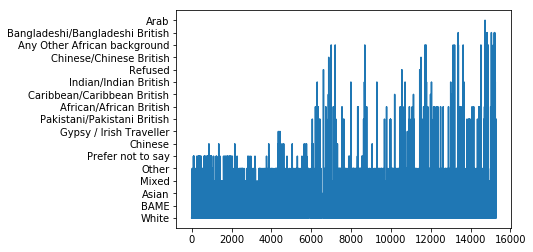

In [74]:
dfdisengaged.describe()
disengbyethnicity = dfdisengaged.groupby(['ethnicity']).size().sort_values(ascending = False)
disengbyethnicity= np.where(
    df_client_info['ethnicity'].str.contains('White-'), 'White',
    np.where(
        df_client_info['ethnicity'].str.contains('Black/Black'), 'BAME',
        np.where(
            df_client_info['ethnicity'].str.contains('Asian/Asian'), 'Asian',
            np.where(
                df_client_info['ethnicity'].str.contains('Mixed'), 'Mixed',
                df_client_info['ethnicity']
            )
        )
    )
)
plt.plot(disengbyethnicity)
#plt.plot(disengbysite)



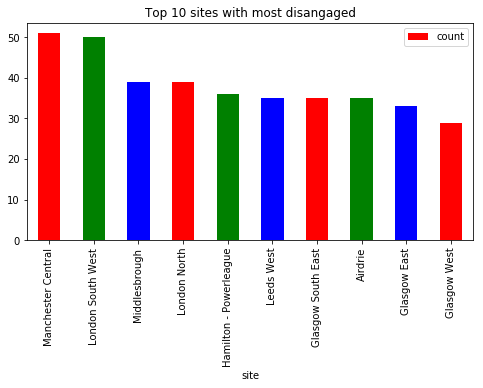

In [513]:
dfdisengaged.describe()
disengbysite = dfdisengaged.groupby('site').size().sort_values(ascending = False).to_frame('count').reset_index()

disengbysite
top_10= disengbysite.nlargest(10,'count')

top_10.plot(
    x='site', 
    y='count',
    kind='bar',
    color=['r','g','b'],
    figsize=(8, 4),
    title='Top 10 sites with most disangaged')

,gender,total,percentage
0,Male,637,4.15932
1,Female,111,0.72478
2,Other,3,0.0195886


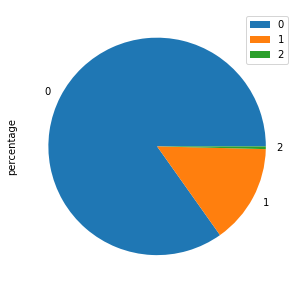

In [327]:
#total=dfclient.clientid.count()
distotal=dfclient.clientid.count()
distotal
#print('percentage of positive outcome' ,float(dis * 100) /total)
#disengbygender = dfdisengaged.groupby('gender').size().sort_values(ascending = False).to_frame('total').reset_index()
disengbygender['percentage']=disengbygender['total'] *100 / distotal

disengbygender=disengbygender
#plot = df.plot.pie(disengbygender, figsize=(5, 5))

#disengbygender

#disengbygender.index('gender')
plot = disengbygender.plot.pie(y='percentage', figsize=(5, 5))
disengbygender



In [334]:
dfactivity.clientid.count()
dfdisengageactivity = pd.merge(dfclientdiseng,dfactivity,left_on='clientid',right_on='clientid',how='left')
dfdisengageactivity

#dfactivity.activity_name.nunique()
#dfactivity.activity_group.nunique()
#dfactivity.clientid ==10001
dfdisengageactivity = dfdisengageactivity[dfdisengageactivity.activity_group == 'Disengagement']

dfdisengageactivity.drop(['activity_group','activity_status','client_beneficiary_hours','programme_name'],axis=1)

dfdisengageactivity.activity_name.value_counts()

Disengaged                        275
Gone AWOL                         245
Unstable personal life             48
Engaging with another provider     39
No longer wishes to work           36
Uncontactable                      24
Removed for behavourial issues     23
Mentally not fit for work          20
Other personal commitments         19
Moved outside of region            11
Prison                              8
Physically not fit for work         7
Carer Commitments                   4
Childcare commitments               2
Pregnant                            1
Name: activity_name, dtype: int64

In [339]:
dfclientdiseng.clientid.count()
dfactivity.activity_name.value_counts()

Registration                                                                          15172
3 Months Employment Sustainability                                                     4423
6 Months Employment Sustainability                                                     4152
9 Months Employment Sustainability                                                     3523
12 Months Employment Sustainability                                                    3473
Academy Achiever                                                                       3399
Employment 25 hours and above                                                          3163
Academy Starter (Contracted SDS 3)                                                     2635
Positive Early Leaver                                                                  2239
Academy Completer                                                                      2107
Street Football Starter                                                         

In [539]:
#Negative Early Leaver
#dfactivity.activity_name.value_counts()
dfdisengagementNew =dfactivity[(dfactivity.activity_group == 'Disengagement') |(dfactivity.activity_name == 'Negative Early Leaver')]['clientid']
#dfdisengagementNew = dfactivity[(dfactivity['activity_group'] == 'Disengagement') |(dfactivity['activity_name'] == 'Negative Early Leaver')]

#dfdisengagementNew=dfdisengagementNew.append(dfactivity[dfactivity.activity_name == 'Negative Early Leaver'])
disengager = dfactivity.loc[np.logical_or((dfactivity.activity_group == 'Disengagement'),(dfactivity.activity_name == 'Negative Early Leaver')),'clientid'].unique()

#dfdisengagementNew.head(100).sort_values('clientid')
len(disengager)
#dfdisengagementNew.drop_duplicates()

dfengegedactivity =dfactivity[(dfactivity.activity_group != 'Disengagement') |(dfactivity.activity_name != 'Negative Early Leaver')]

#dfdisendfdisactivity.head()   
#dfdisendfdisactivity.count()       
dfdisengagementNew.count()
#dfdisendfdisactivity = pd.merge(dfactivity,dfdisengagementNew, lefton ='clientid' ,)
#dfdisendfdisactivity=pd.merge(dfactivity,dfdisengagementNew,left_on='clientid',right_on='clientid',how='right')
dfdisendfdisactivity.sort_values('clientid')
#dfdisendfdisactivity.groupby('activity_name').size().sort_values(ascending = False)




,clientid,activity_group,activity_name,activity_date,activity_status,client_beneficiary_hours,programme_name
14237,5869,Sustainability,6 Months Employment Sustainability,2013-03-02,Unsuccessful,0.0,NaN
14249,5869,Work Experience (Started),Work Experience External,2012-10-05,Successful,0.0,NaN
14248,5869,Engagement,Registration,2012-07-27,Successful,0.0,NaN
14247,5869,Qualification (Registered),Community Sports Leaders Level 2 Award - (Start),2012-08-13,Successful,0.0,NaN
14246,5869,Progression Milestones,First aid Certficate Completed,2012-09-06,Successful,0.0,NaN
14244,5869,Progression Milestones,SFA Level 1.1-1.3 course Completed,2012-09-18,Successful,0.0,NaN
14245,5869,Progression Milestones,Volunteering with a Partner Organisation,2012-09-12,Successful,0.0,NaN
14242,5869,Academy Exit Route,Negative Early Leaver,2016-03-08,Successful,0.0,NaN
14241,5869,Hard Outcomes,Employment 25 hours and above,2012-12-02,Successful,0.0,NaN
14240,5869,Sustainability,3 Months Employment Sustainability,2013-03-02,Unsuccessful,0.0,NaN


In [364]:
dfactivity.activity_group.value_counts()

Sustainability                17838
Engagement                    16543
Starter Type                  12319
Academy Exit Route             9984
Qualification (Result)         8200
Hard Outcomes                  8009
Qualification (Registered)     7777
Not in use                     6781
Progression Milestones         6185
Work Experience (Started)      2154
Work Experience (Complete)     2098
SDS Payment Claims             1500
Aftercare                       910
Disengagement                   762
Fitness Testing                 620
Referrals                        40
ESF Payment Claims               10
Rathbone Payment Claims           2
Name: activity_group, dtype: int64

,0
registration_date,
2012,1421
2013,1817
2014,2104
2015,2175
2016,2107
2017,2748
2018,1841
2019,1069


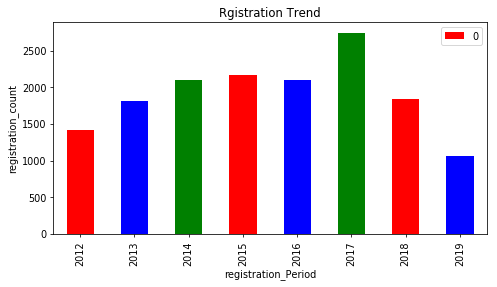

In [72]:
df_client_info = pd.read_csv("client_info.csv", parse_dates=["registration_date"], infer_datetime_format=True,)

df_client_info = df_client_info[df_client_info["registration_date"].apply(lambda x: x.year > 2011 and x.year < 2020)]
df_client_info.head()
#df_client_info["registration_date"].value_counts().sort_index()

#df_client_info["registration_date"].value_counts().sort_index().plot()
df_client_infoyear = df_client_info.groupby(df_client_info["registration_date"].dt.year).size().to_frame()
fig, ax = plt.subplots(figsize=(8,4),dpi=70)
df_client_infoyear.plot(kind='bar',ax=ax, color=['rbg'])
ax.set_ylabel('registration_count')
ax.set_xlabel('registration_Period')
ax.set_title('Rgistration Trend')
df_client_infoyear

In [437]:
dfdisengaged.head()
dfdisengageact = pd.merge(dfdisengaged,dfdisengageactivity, left_on='clientid',right_on='clientid',how='left')
dfdisengageact['activity_date'] = pd.to_datetime(dfdisengageact['activity_date'])

dfdisengageact['engagedperiod'] = dfdisengageact['activity_date'].sub(dfdisengageact['registration_date'], axis=0)
#dfdisengageact['engagedperiod'].str.slice(-1,4)
#dfdisengageact['engagedperiod'].astype('object')
dfdisengageact['engagedperiod'] = dfdisengageact['engagedperiod'].apply(lambda x : x.days)
dfdisengageact.drop_duplicates()
dfdisengageact.head()

,clientid,site,gender,ethnicity,registration_date,postcode_outcode,postcode_sector,birth_year,birth_month,activity_group,activity_name,activity_date,activity_status,client_beneficiary_hours,programme_name,engagedperiod
0,6313,Glasgow West,Male,White-British,2012-10-22,G72,G72 8,1990,2.0,Disengagement,Disengaged,2015-11-04,Successful,0.0,NaN,1108
1,6313,Glasgow West,Male,White-British,2012-10-22,G72,G72 8,1990,2.0,Disengagement,Disengaged,2015-10-06,Successful,0.0,NaN,1079
2,6411,Hamilton - Powerleague,Male,White-British,2012-11-05,ML9,ML9 3,1996,1.0,Disengagement,Disengaged,2015-08-24,Successful,0.0,NaN,1022
3,6471,Ravenscraig - Motherwell,Male,White-Scottish,2015-09-29,ML4,ML4 2,1996,4.0,Disengagement,Gone AWOL,2017-04-07,Successful,0.0,NaN,556
4,6578,Manchester Central,Male,Asian/Asian British-Pakistani,2016-02-22,M12,M12 4,1993,4.0,Disengagement,Disengaged,2016-10-11,Successful,0.0,NaN,232


In [460]:
dfmaster = pd.read_csv('master_table.csv')
dfmaster.head()

,clientid,site,gender,ethnicity,registration_date,postcode_outcode,postcode_sector,age,test,nationality,...,benefits,barriers,qualification,id_recorded,is_refugee,religion,housing_type,employement_status,current_education_status,disengaged
0,147,Glasgow North,Male,White,2010-04-01,G37,G37 0,26.0,NaN,UK,...,no benefits,NaN,NaN,False,False,NaN,home,unemployed,NaN,False
1,475,Inverclyde,Male,White,2012-11-07,PA14,PA14 6,28.0,NaN,UK,...,no benefits,NaN,NaN,False,False,NaN,home,unemployed,NaN,False
2,531,Inverclyde,Male,White,2012-11-07,PA15,PA15 2,28.0,NaN,UK,...,benefits,NaN,higher qualification,False,False,NaN,home,unemployed,NaN,False
3,584,Inverclyde,Male,White,2012-05-31,PA14,PA14 6,23.0,NaN,UK,...,no benefits,NaN,NaN,False,False,NaN,home,unemployed,NaN,False
4,1642,Middlesbrough,Male,White,2013-02-06,TS2,TS2 1,35.0,NaN,UK,...,benefits,NaN,middle qualification,False,False,NaN,temporary,unemployed,NaN,False


In [463]:
dfmaster.columns


Index(['clientid', 'site', 'gender', 'ethnicity', 'registration_date',
       'postcode_outcode', 'postcode_sector', 'age', 'test', 'nationality',
       'sexual_orientation', 'benefits', 'barriers', 'qualification',
       'id_recorded', 'is_refugee', 'religion', 'housing_type',
       'employement_status', 'current_education_status', 'disengaged'],
      dtype='object')

Text(0.5, 1.0, 'Disengagement Period')

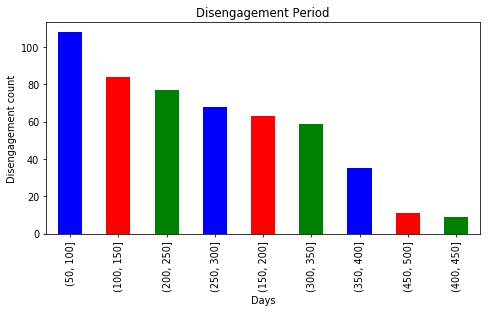

In [514]:
dfdisengageact

bins = [50,100,150,200,250,300,350,400,450,500]
s = pd.cut(dfdisengageact['engagedperiod'], bins=bins).value_counts()
s
#s.plot.bar(xlabe='days',ylabel ='disengagecount')
fig, ax = plt.subplots(figsize=(8,4),dpi=70)
s.plot(kind='bar', ax=ax,color= ['b','r','g'])
ax.set_ylabel('Disengagement count')
ax.set_xlabel('Days')
ax.set_title('Disengagement Period')


In [80]:
#Ethnicity mapping:

df_client_info = pd.read_csv('client_info.csv', parse_dates=True)

df_client_info['ethnicity_group'] = np.where(
    df_client_info['ethnicity'].str.contains('White-'), 'White',
    np.where(
        df_client_info['ethnicity'].str.contains('Black/Black'), 'BAME',
        np.where(
            df_client_info['ethnicity'].str.contains('Asian/Asian'), 'Asian',
            np.where(
                df_client_info['ethnicity'].str.contains('Mixed'), 'Mixed',
                df_client_info['ethnicity']
            )
        )
    )
)
df_client_info.head(50)


,clientid,site,gender,ethnicity,registration_date,postcode_outcode,postcode_sector,birth_year,birth_month,ethnicity_group
0,147,Glasgow North,Male,White-British,2010-04-01,G37,G37 0,1992,11.0,White
1,475,Inverclyde,Male,White-British,2012-11-07,PA14,PA14 6,1991,3.0,White
2,531,Inverclyde,Male,White-British,2012-11-07,PA15,PA15 2,1990,10.0,White
3,584,Inverclyde,Male,White-British,2012-05-31,PA14,PA14 6,1996,1.0,White
4,1642,Middlesbrough,Male,White-British,2013-02-06,TS2,TS2 1,1984,7.0,White
5,5114,London South West,Male,Black/Black British-Caribbean,2012-04-04,sw9,sw9 9,1987,6.0,BAME
6,5115,London North West,Male,White-British,2012-04-04,sw15,sw15 5,1993,7.0,White
7,5116,London North West,Male,White-Other,2012-04-04,sw15,sw15 6,1993,6.0,White
8,5118,London South,Male,Asian/Asian British-Other,2012-04-03,se25,se25 6,1994,8.0,Asian
9,5119,London South,Male,Black/Black British-Other,2012-04-03,cr9,cr9 2,1992,5.0,BAME


In [84]:
#!pip install pandas_profiling
import pandas_profiling 
pandas_profiling.ProfileReport(dfclient)

 
                            